**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 7**
Análisis de Componentes Principales (PCA)

---

*   NOMBRE: Fernando Abel Leal Villacicencio
*   MATRÍCULA: A01796859
*   NOMBRE: Carlos Isaac Sagrero Campos
*   MATRÍCULA: A01796826
*   NOMBRE: Oscar F Barajas Matxo
*   MATRÍCULA: A01350763

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [126]:
cereals_df = pd.read_csv('Cereals.csv')

BK = cereals_df.copy()
BK['shelf'] = BK['shelf'].astype('object')
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


# **Parte 1**. EDA y preprocesamiento

In [127]:
BK['mfr'].replace({'N': 'Nabisco', 'Q': 'Quaker Oats', 'K': 'Kelloggs', 'G': 'General Mills',
                   'R': 'Ralston Purina', 'P': 'Post', 'A': 'American Home Food Products'}, inplace=True)

1. Obtén estadísticas descriptivas para todas las variables del dataframe. 

In [128]:
round(BK.select_dtypes('number').describe().T,2)

,count,mean,std,min,25%,50%,75%,max
calories,77.0,106.88,19.48,50.00,100.00,110.00,110.00,160.0
protein,77.0,2.55,1.09,1.00,2.00,3.00,3.00,6.0
fat,77.0,1.01,1.01,0.00,0.00,1.00,2.00,5.0
sodium,77.0,159.68,83.83,0.00,130.00,180.00,210.00,320.0
fiber,77.0,2.15,2.38,0.00,1.00,2.00,3.00,14.0
carbo,76.0,14.80,3.91,5.00,12.00,14.50,17.00,23.0
sugars,76.0,7.03,4.38,0.00,3.00,7.00,11.00,15.0
potass,75.0,98.67,70.41,15.00,42.50,90.00,120.00,330.0
vitamins,77.0,28.25,22.34,0.00,25.00,25.00,25.00,100.0
weight,77.0,1.03,0.15,0.50,1.00,1.00,1.00,1.5


In [129]:
BK.select_dtypes('object').describe().T

,count,unique,top,freq
name,77,77,100%_Bran,1
mfr,77,7,Kelloggs,23
type,77,2,C,74
shelf,77,3,3,36


Genera algunos gráficos para familiarizarte con el conjunto de datos. Al menos deberás incluir los que te permitan responder los siguientes cuestionamientos:

**Nota.** Debes responder de manera explícita las preguntas, apoyándote de los resultados observados de cada gráfico. 

2a) ¿Cuál es la frecuencia o conteo de cada categoría para las variables: `mfr` y `shelf` (por separado)? 

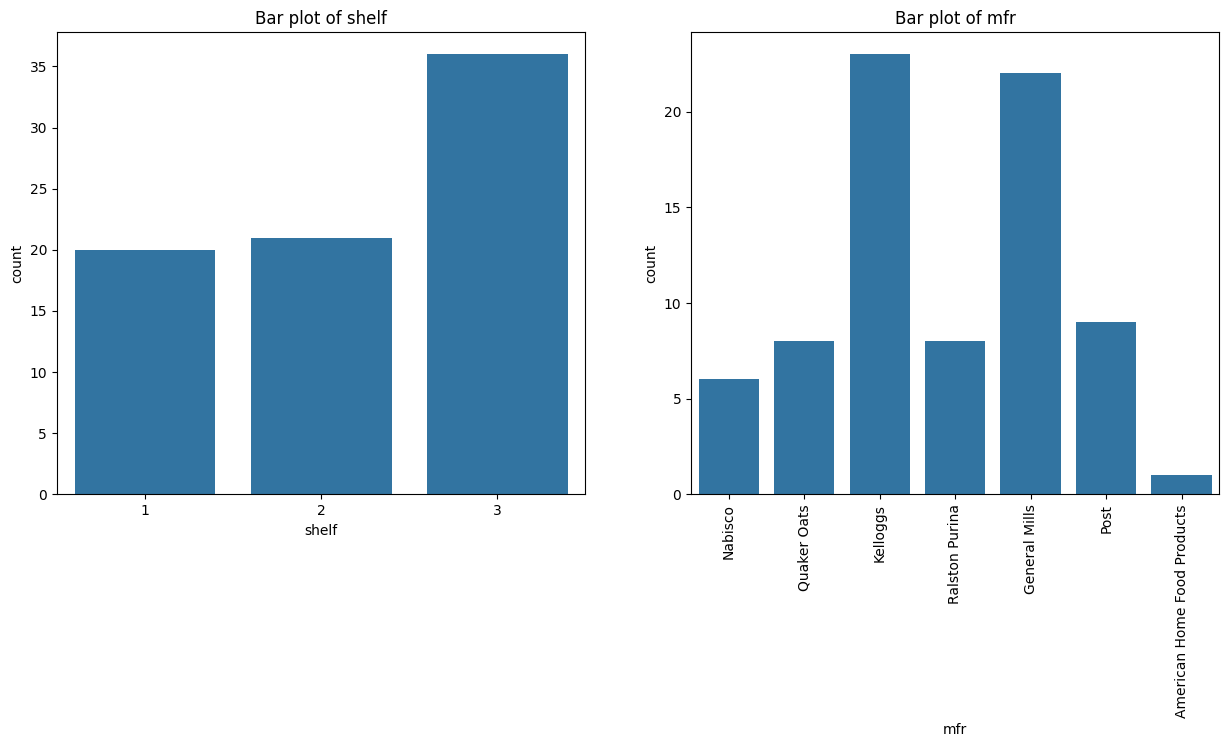

In [130]:
def diagnostic_plots(BK, mfr_col, shelf_col): 
    plt.figure(figsize=(15,6))

    # Histograma del shelf
    plt.subplot(1, 2, 1)
    sns.countplot(x=BK[shelf_col])
    plt.title(f"Bar plot of {shelf_col}")

    # Gráfico de barras para mfr
    plt.subplot(1, 2, 2)
    sns.countplot(x=BK[mfr_col])
    plt.title(f"Bar plot of {mfr_col}")
    plt.xticks(rotation=90)

    plt.show()

diagnostic_plots(BK, 'mfr', 'shelf')


In [131]:
print('El conteo para la variable Shelf:', BK['shelf'].value_counts(),'\n')
print('El conteo para la variable mfr:', BK['mfr'].value_counts())

El conteo para la variable Shelf: shelf
3    36
2    21
1    20
Name: count, dtype: int64 

El conteo para la variable mfr: mfr
Kelloggs                       23
General Mills                  22
Post                            9
Quaker Oats                     8
Ralston Purina                  8
Nabisco                         6
American Home Food Products     1
Name: count, dtype: int64


2b) Combina los resultados previos para observar, de cada fabricante, cuántos productos tiene en cada estante. 

mfr                          shelf
American Home Food Products  2         1
General Mills                3         9
                             2         7
                             1         6
Kelloggs                     3        12
                             2         7
                             1         4
Nabisco                      1         3
                             2         2
                             3         1
Post                         3         6
                             1         2
                             2         1
Quaker Oats                  3         4
                             2         3
                             1         1
Ralston Purina               3         4
                             1         4
Name: count, dtype: int64


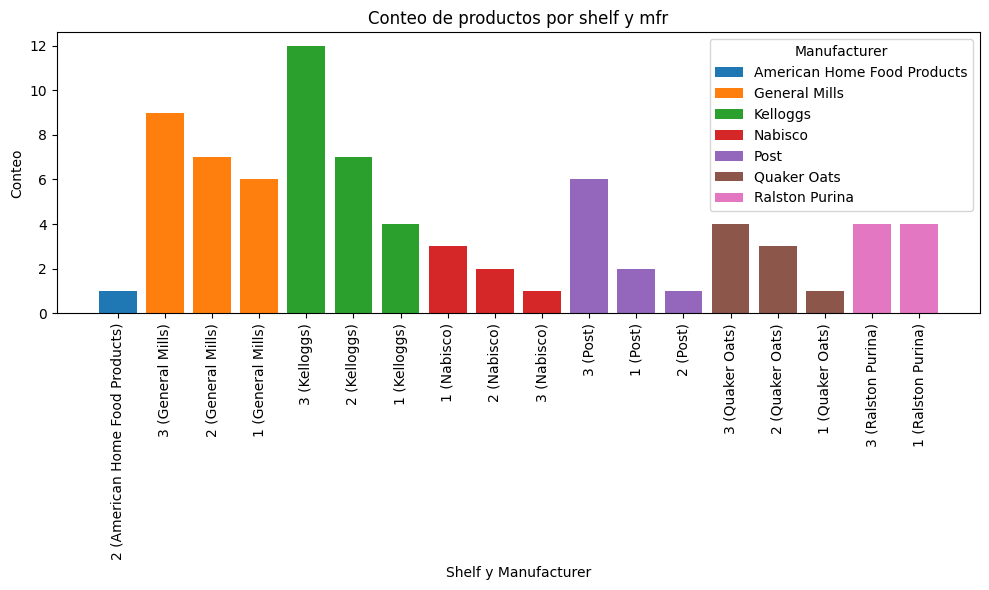

In [132]:
Grouped = BK.groupby('mfr')['shelf'].value_counts()
print(Grouped)


Grouped_df = Grouped.reset_index(name='count')


plt.figure(figsize=(10,6))

for mfr in Grouped_df['mfr'].unique():
    data = Grouped_df[Grouped_df['mfr'] == mfr]
    plt.bar(data['shelf'].astype(str) + ' (' + data['mfr'] + ')', data['count'], label=mfr)


plt.title('Conteo de productos por shelf y mfr')
plt.xlabel('Shelf y Manufacturer')
plt.ylabel('Conteo')
plt.legend(title='Manufacturer')
plt.xticks(rotation=90)

# Mostrar gráfico
plt.tight_layout()
plt.show()



 3a) ¿Cuál es el rango más frecuente de la variable `rating`?

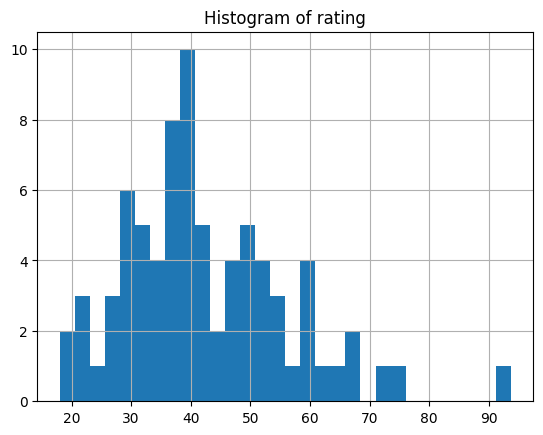

In [133]:
BK['rating'].hist(bins=30)
plt.title('Histogram of rating')
plt.show()

In [134]:
print('El Rango mas frecuente es:', pd.cut(BK['rating'], bins=30).value_counts().idxmax(), 'con', pd.cut(BK['rating'], bins=30).value_counts().max(), 'ocurrencias')

El Rango mas frecuente es: (38.219, 40.741] con 10 ocurrencias


3b) ¿Cuáles son los 10 cereales mejor evaluados y a qué fabricante corresponden? 

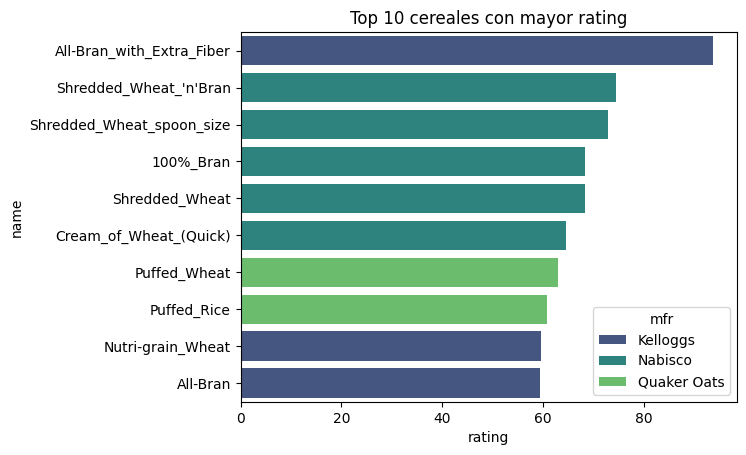

,name,mfr,rating,count
55,All-Bran_with_Extra_Fiber,Kelloggs,93.704912,1
33,Shredded_Wheat_'n'Bran,Nabisco,74.472949,1
32,Shredded_Wheat_spoon_size,Nabisco,72.801787,1
0,100%_Bran,Nabisco,68.402973,1
34,Shredded_Wheat,Nabisco,68.235885,1
59,Cream_of_Wheat_(Quick),Nabisco,64.533816,1
3,Puffed_Wheat,Quaker Oats,63.005645,1
4,Puffed_Rice,Quaker Oats,60.756112,1
8,Nutri-grain_Wheat,Kelloggs,59.642837,1
56,All-Bran,Kelloggs,59.425505,1


In [135]:
sns.barplot(x='rating', y='name', data=BK[['name','mfr', 'rating']].value_counts().reset_index().sort_values(by='rating', ascending=False).head(10), palette='viridis', hue='mfr')
plt.title('Top 10 cereales con mayor rating')
plt.show()

BK[['name','mfr', 'rating']].value_counts().reset_index().sort_values(by='rating', ascending=False).head(10)


4a) Compara la distribución de las calorías según el fabricante, por medio de boxplots. 

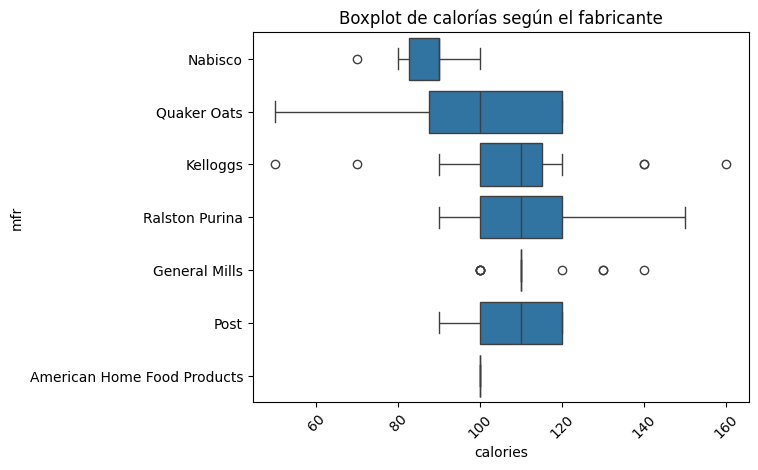

In [136]:
sns.boxplot(x='calories',y='mfr', data=BK, orient='y')
plt.title('Boxplot de calorías según el fabricante')
plt.xticks(rotation=45)
plt.show()

4b) ¿Cuáles son las dos variables que tienen mayor correlación con `rating`? 

<AxesSubplot: >

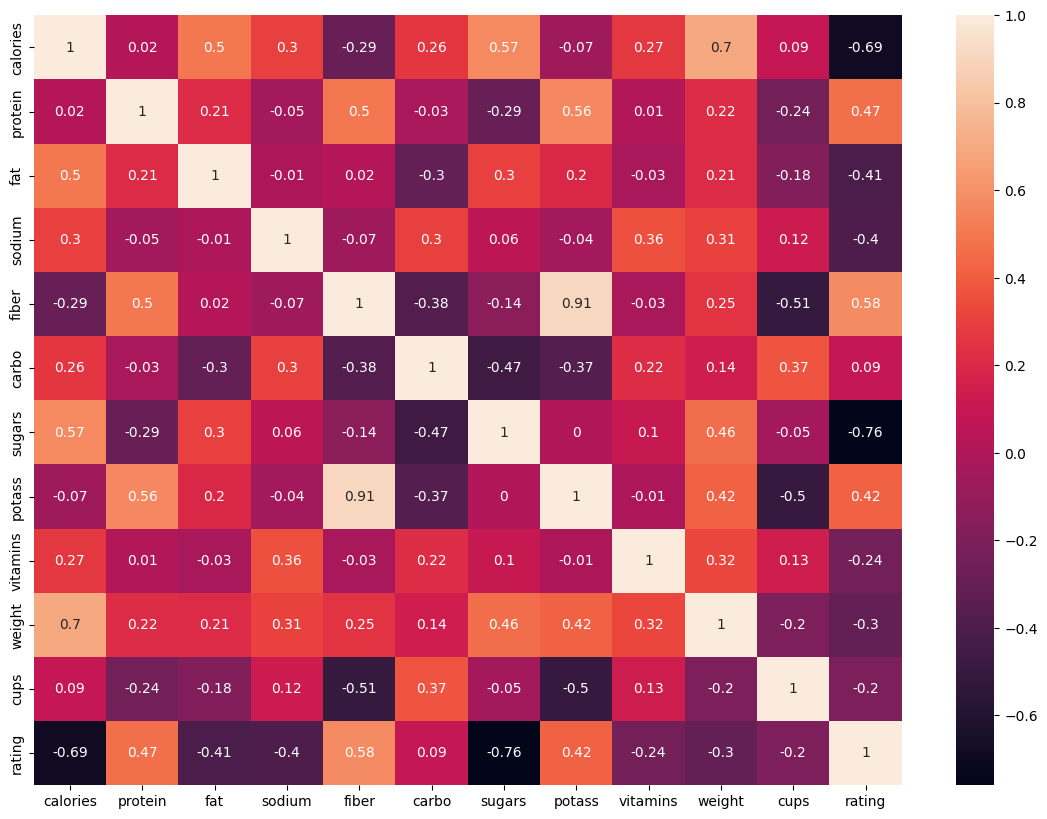

In [137]:
plt.figure(figsize = (14, 10))
sns.heatmap(round(BK.corr(numeric_only=True),2), annot = True)

In [138]:
round(BK.corr(numeric_only=True)['rating'],2).reset_index().sort_values(by='rating', ascending=False).head(3)

,index,rating
11,rating,1.00
4,fiber,0.58
1,protein,0.47


Los `gramos de fibra dietética` y los `gramos de proteína` son las dos varibles con la mayor correlacion

5. Elimina todos los registros con algún dato faltante y reinicia el índice del dataframe para que quede con valores consecutivos. 

In [139]:
BK.dropna(inplace=True)
BK.reset_index(drop=True, inplace=True)
BK.isna().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

# **Parte 2**. Ingeniería de características

6. Considerando que `rating` es la variable de salida, almacénala en una variable `y` y separa los predictores **numéricos** en `X`. Escala los valores de `X` y aplica `PCA` para proyectar los datos en el nuevo espacio de vectores. 

In [140]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [141]:
Y = BK['rating']
X = BK.select_dtypes('number').drop(columns='rating')

scaler = StandardScaler()
transform = scaler.fit_transform(X)
df_transform = pd.DataFrame(transform, columns=X.columns)
df_transform

pca = PCA()
principalComponents = pca.fit_transform(df_transform)
principalComponents = pd.DataFrame(principalComponents)
principalComponents

,0,1,2,3,4,5,6,7,8,9,10
0,5.041308,2.470097,-0.054581,-1.129434,0.667588,0.640401,0.022399,0.059205,0.026325,0.250917,0.021692
1,1.503568,-0.310316,-3.014154,3.202758,1.344651,0.066992,-0.396573,-1.228817,-0.594837,0.042521,-0.096381
2,4.866598,1.946814,0.869813,-1.225550,0.358265,1.832924,-0.232872,0.017511,0.116766,-0.493001,-0.031211
3,5.468886,3.899001,1.883856,-1.628993,0.601691,0.374002,-0.811525,-1.003853,0.063792,0.720550,0.101563
4,0.088378,-0.391583,-1.490079,0.054716,0.331903,0.848360,0.271351,0.033091,-0.183945,0.169367,-0.050918
...,...,...,...,...,...,...,...,...,...,...,...
69,-1.442524,-0.260808,1.160446,0.531351,-1.053122,0.817503,0.665223,-0.280993,0.054940,-0.344181,0.089951
70,-1.634842,-0.417530,-1.672206,-0.593553,0.134293,-0.082682,-0.257906,-0.161360,-0.099496,0.099663,0.098120
71,0.389697,0.475626,1.182007,0.334499,-0.494861,0.820825,0.328101,0.005608,0.045088,-0.031525,0.078019
72,-0.172304,0.491070,1.163945,0.580625,0.146570,0.290806,-0.627485,-0.334248,-0.067364,0.084460,0.047027


7. Obtén la curva del porcentaje de varianza acumulada y determine el número mínimo de componentes principales que explique más del 90% de la varianza. Imprime la información de dichos componentes. 

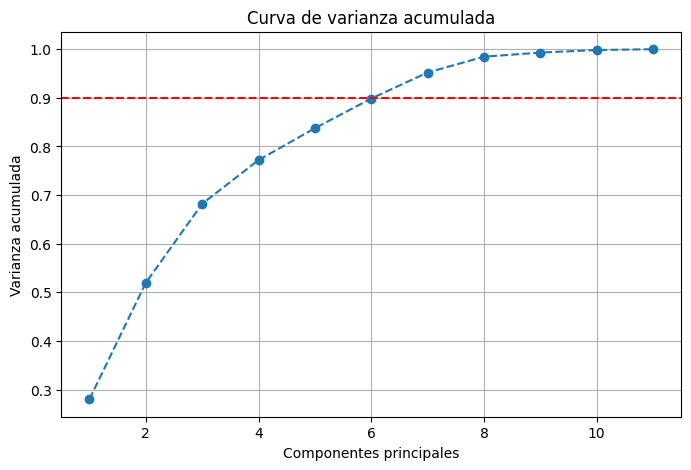

Número mínimo de componentes que explican más del 90% de la varianza: 7
Varianza explicada por estos componentes: 0.9521


In [142]:
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)


plt.figure(figsize=(8,5))
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o', linestyle='--')
plt.xlabel('Componentes principales')
plt.ylabel('Varianza acumulada')
plt.title('Curva de varianza acumulada')
plt.axhline(y=0.90, color='r', linestyle='--')
plt.grid()
plt.show()


num_componentes_90 = np.argmax(varianza_acumulada >= 0.90) + 1
print(f'Número mínimo de componentes que explican más del 90% de la varianza: {num_componentes_90}')
print(f'Varianza explicada por estos componentes: {varianza_acumulada[num_componentes_90 - 1]:.4f}')

In [143]:
min_cp = principalComponents.iloc[:, :num_componentes_90]
min_cp

,0,1,2,3,4,5,6
0,5.041308,2.470097,-0.054581,-1.129434,0.667588,0.640401,0.022399
1,1.503568,-0.310316,-3.014154,3.202758,1.344651,0.066992,-0.396573
2,4.866598,1.946814,0.869813,-1.225550,0.358265,1.832924,-0.232872
3,5.468886,3.899001,1.883856,-1.628993,0.601691,0.374002,-0.811525
4,0.088378,-0.391583,-1.490079,0.054716,0.331903,0.848360,0.271351
...,...,...,...,...,...,...,...
69,-1.442524,-0.260808,1.160446,0.531351,-1.053122,0.817503,0.665223
70,-1.634842,-0.417530,-1.672206,-0.593553,0.134293,-0.082682,-0.257906
71,0.389697,0.475626,1.182007,0.334499,-0.494861,0.820825,0.328101
72,-0.172304,0.491070,1.163945,0.580625,0.146570,0.290806,-0.627485


8. ¿Cuáles son las tres variables más importantes en el cálculo del primer componente?


,Principal component 1
potass,53.15
fiber,50.00
cups,38.87


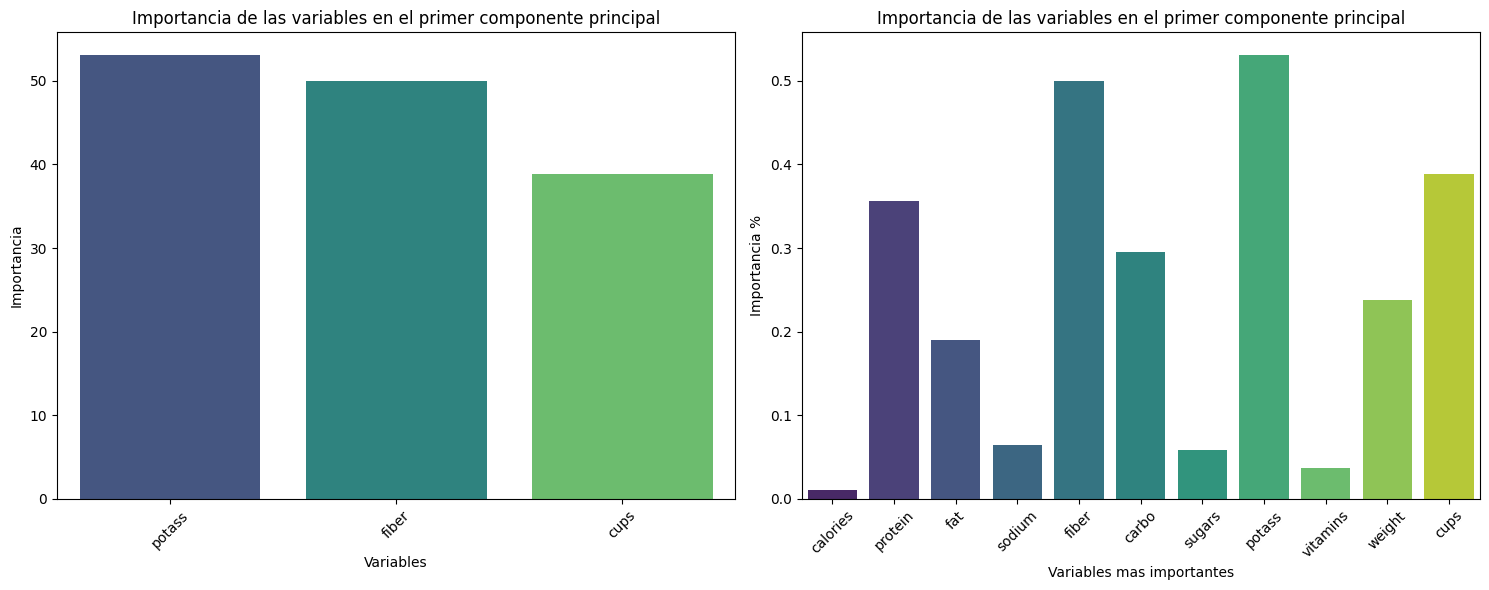

In [144]:
pca.components_
num_components = 1
pc_df_org = pd.DataFrame(abs(pca.components_[:num_components]), columns = X.columns, index=['Principal component {}'.format(i) for i in range(1, num_components + 1)])
pc_df = round(pc_df_org*100,2).T.sort_values(by='Principal component 1', ascending=False).head(3)
display(pc_df)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(x=pc_df_org.columns, y=pc_df_org.iloc[0], palette='viridis', ax=axes[1], hue=pc_df_org.columns)
axes[0].set_title('Importancia de las variables en el primer componente principal')
axes[0].set_xlabel('Variables')
axes[0].set_ylabel('Importancia')
axes[0].tick_params(axis='x', rotation=45)  

sns.barplot(x=pc_df.index, y=pc_df['Principal component 1'], palette='viridis', hue=pc_df.index, ax=axes[0])
axes[1].set_title('Importancia de las variables en el primer componente principal')
axes[1].set_xlabel('Variables mas importantes')
axes[1].set_ylabel('Importancia %')
axes[1].tick_params(axis='x', rotation=45) 

plt.tight_layout()
plt.show()


Las tres variables más importantes son:  `potass`, `fiber` y `cups`

9. ¿Todas las variables categóricas son predictores? Aplica una técnica de encoding a las que sí lo sean. Justifica la elección de tu técnica. 

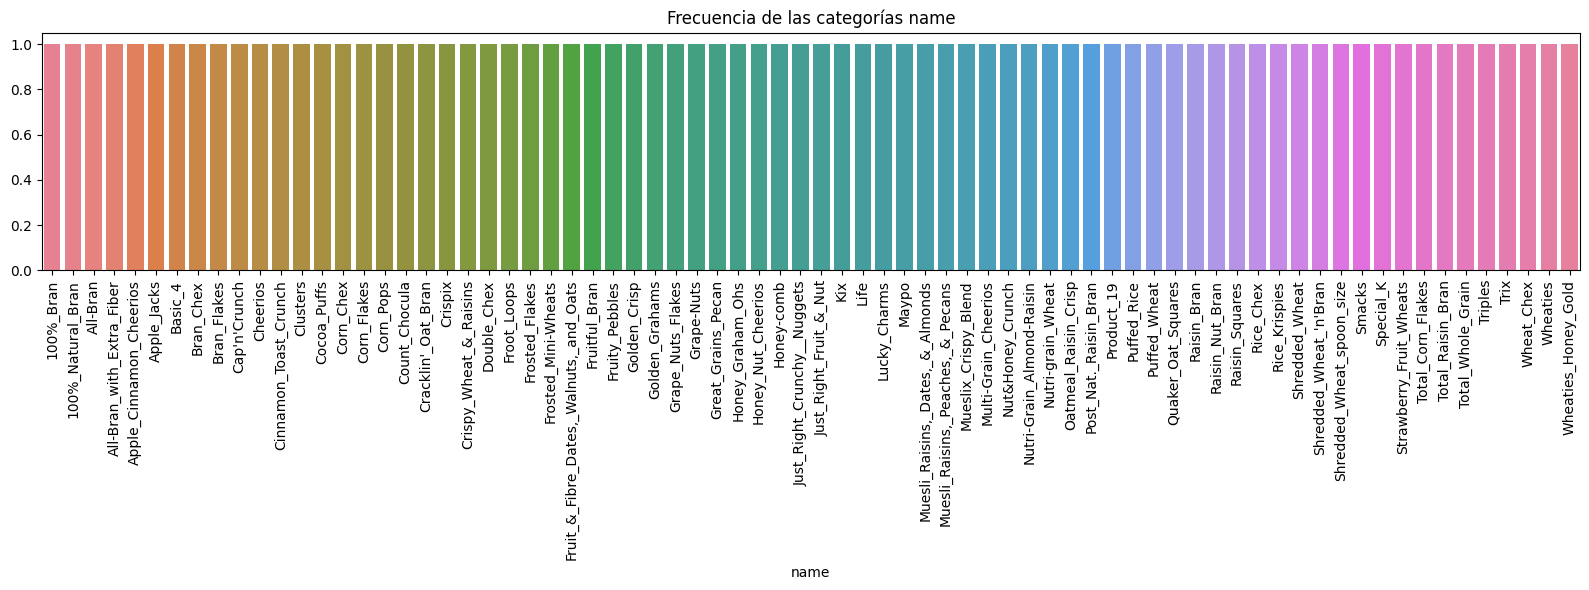

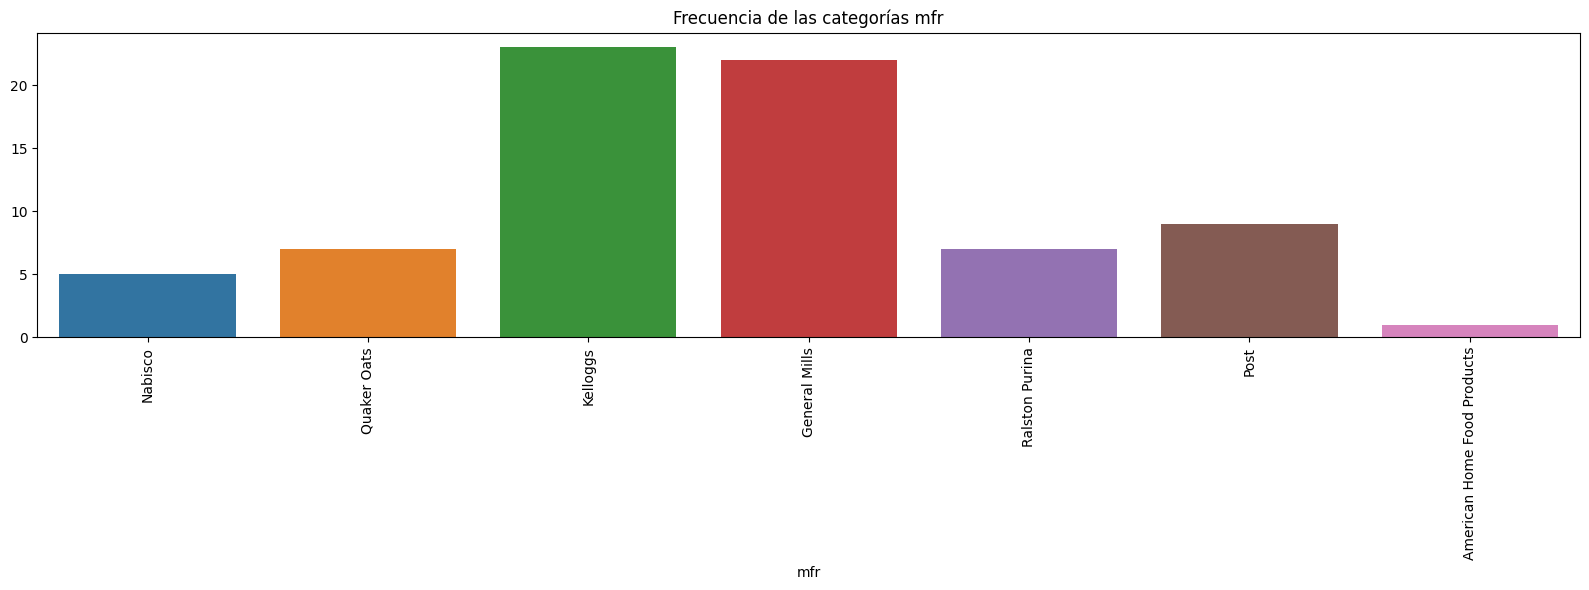

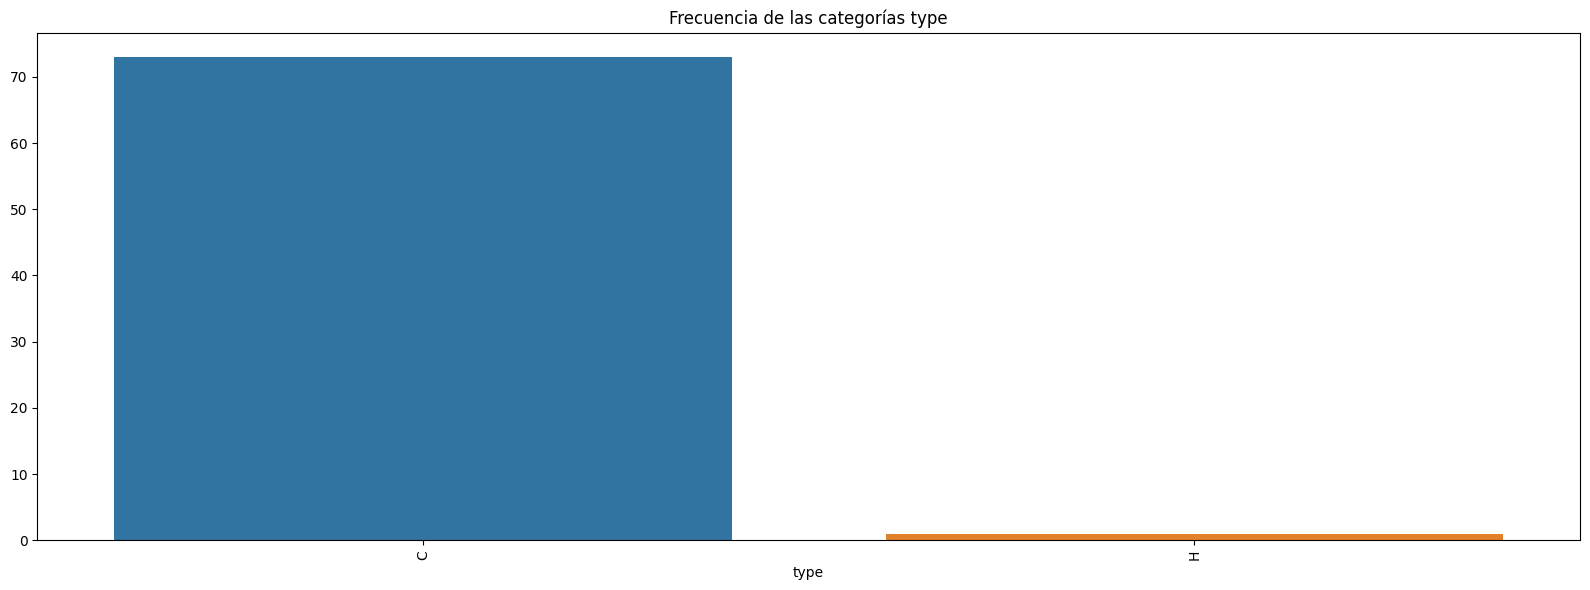

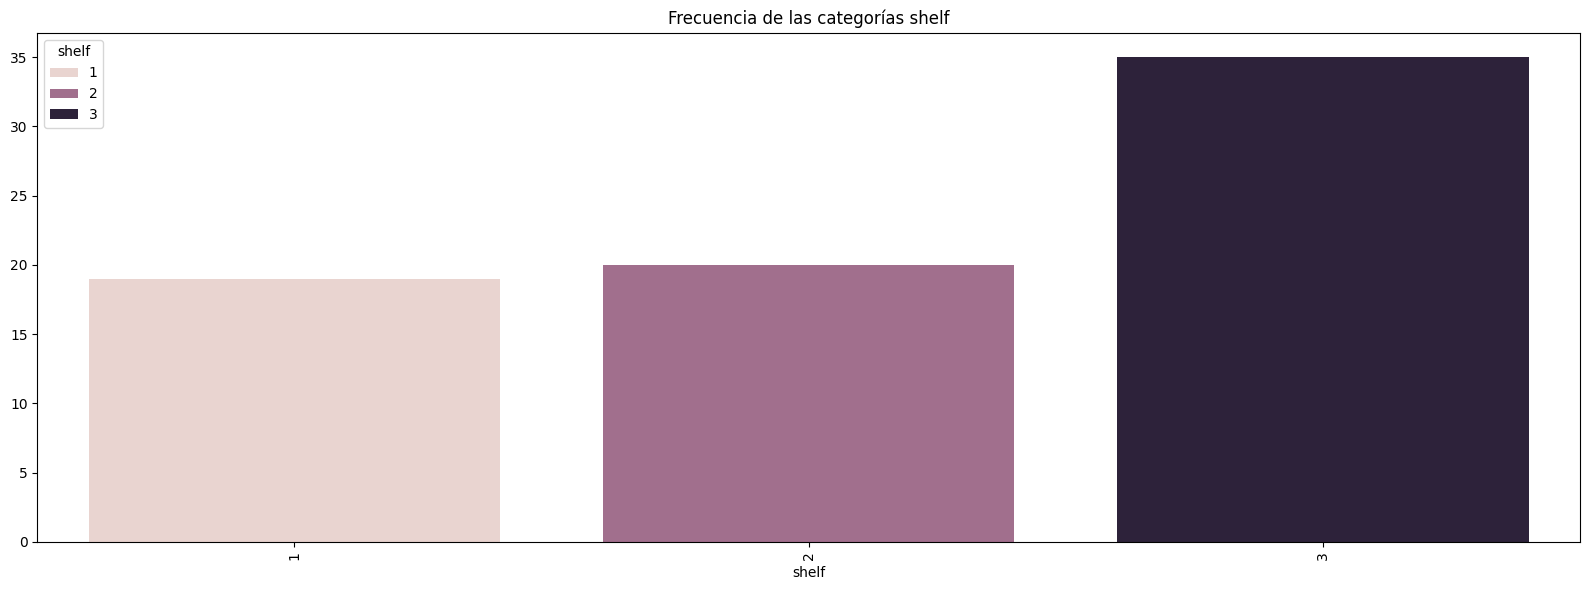

In [145]:
df_obj = BK.select_dtypes('object')

for col in df_obj.columns:
    plt.figure(figsize=(16, 6))
    sns.countplot(data=df_obj, x=col, hue=col)
    plt.title(f'Frecuencia de las categorías {col}')
    plt.xticks(rotation=90)
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

In [146]:
variables = BK.select_dtypes('object').drop(columns='name')
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_data = encoder.fit_transform(variables)

columns = encoder.get_feature_names_out(variables.columns)
onehot_df = pd.DataFrame(encoded_data, columns=columns, index=variables.index)
onehot_df

,mfr_General Mills,mfr_Kelloggs,mfr_Nabisco,mfr_Post,mfr_Quaker Oats,mfr_Ralston Purina,type_H,shelf_2,shelf_3
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
69,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
70,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
71,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
72,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Debido a que la variable `name` no es un buen predictor, ya que cada cereal tiene una representación única que no aporta significativamente a la predicción, se excluyó de la técnica de codificación. Para las demás variables, se aplicó la técnica de One-Hot Encoding, ya que las categorías son nominales, lo que significa que no poseen un orden. De esta manera, se convierte cada categoría en una columna binaria, lo cual es útil para la mayoría de los modelos de machine learning.

10. Conjunta, en un dataframe, las valores proyectados en los componentes seleccionados (mínimo), las transformaciones obtenidas de las variables categóricas que serán predictores y la variable de salida. Almacena el dataframe resultante en archivo. 

In [147]:
min_cp.reset_index(drop=True, inplace=True)
onehot_df.reset_index(drop=True, inplace=True)
Y.reset_index(drop=True, inplace=True)

concatenated_df = pd.concat([min_cp, onehot_df, Y], axis=1)
display(concatenated_df)
concatenated_df.to_csv('Actividad7PCA_Result.csv')


,0,1,2,3,4,5,6,mfr_General Mills,mfr_Kelloggs,mfr_Nabisco,mfr_Post,mfr_Quaker Oats,mfr_Ralston Purina,type_H,shelf_2,shelf_3,rating
0,5.041308,2.470097,-0.054581,-1.129434,0.667588,0.640401,0.022399,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,68.402973
1,1.503568,-0.310316,-3.014154,3.202758,1.344651,0.066992,-0.396573,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,33.983679
2,4.866598,1.946814,0.869813,-1.225550,0.358265,1.832924,-0.232872,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,59.425505
3,5.468886,3.899001,1.883856,-1.628993,0.601691,0.374002,-0.811525,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,93.704912
4,0.088378,-0.391583,-1.490079,0.054716,0.331903,0.848360,0.271351,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,-1.442524,-0.260808,1.160446,0.531351,-1.053122,0.817503,0.665223,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,39.106174
70,-1.634842,-0.417530,-1.672206,-0.593553,0.134293,-0.082682,-0.257906,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27.753301
71,0.389697,0.475626,1.182007,0.334499,-0.494861,0.820825,0.328101,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,49.787445
72,-0.172304,0.491070,1.163945,0.580625,0.146570,0.290806,-0.627485,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.592193
